In [ ]:
!pip install transformers[torch]

In [ ]:
import numpy as np
import pandas as pd
import torch
import transformers as ppb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
df = pd.read_csv('receita_noticia_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,caption,target
0,0,Você já comeu arroz de preguiçoso! Veja como é...,0
1,1,Marque aquele amigo que ama doce só pra ele fi...,0
2,2,"Bolo de caneca!Tem receita no canal, link na b...",0
3,3,Qual nota merece essa receita meus amores? Dei...,0
4,4,Meninas e Meninas veja meu STORIES sobre o CH...,0


In [ ]:
batch_1 = df[:400]

In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenized = batch_1['caption'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(400, 225)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()
labels = batch_1['target']

In [ ]:
'''
labels = batch_1['target']
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

lr_clf.score(test_features, test_labels)
'''

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

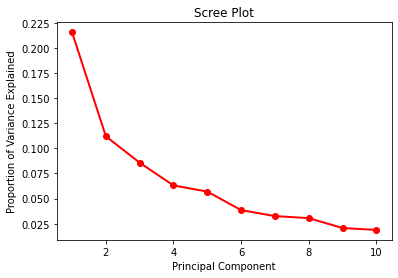

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(features)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

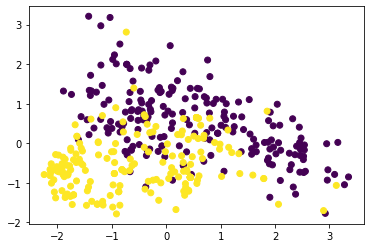

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.show()

In [ ]:
# reduce dimensionality with t-sne
tsne = TSNE()
tsne_results = tsne.fit_transform(features)

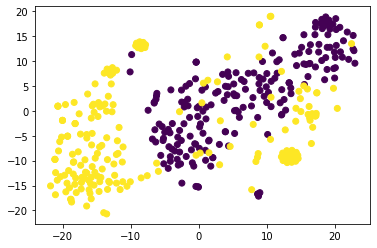

In [ ]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels)
plt.show()